<a href="https://colab.research.google.com/github/a01452054/Econometria/blob/main/Pregunta_19_Econometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the data file containing GS3M and GS6M rates.


Saving Table 22.7 Gujarati.xlsx to Table 22.7 Gujarati (3).xlsx


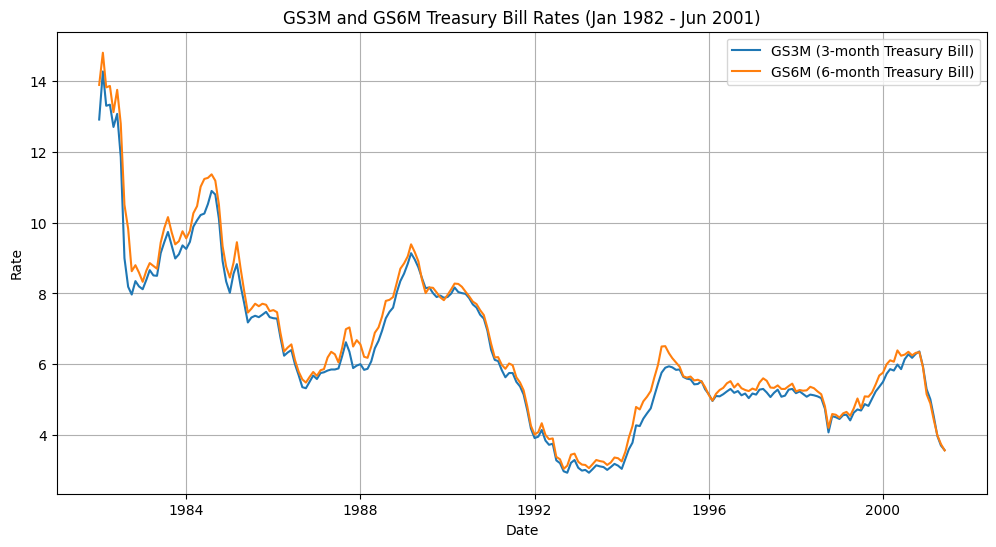


ADF Test for GS3M:
ADF Statistic: -1.5391858164849086
p-value: 0.514045363282407
Critical Values:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348
GS3M is non-stationary (fail to reject null hypothesis).

ADF Test for GS6M:
ADF Statistic: -3.7738194363438047
p-value: 0.003186826077188909
Critical Values:
	1%: -3.458854867412691
	5%: -2.8740800599399323
	10%: -2.573453223097503
GS6M is stationary (reject null hypothesis).

Checking first differences for GS3M...

ADF Test for GS3M First Difference:
ADF Statistic: -5.573440308131572
p-value: 1.449964833915459e-06
Critical Values:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348
GS3M First Difference is stationary (reject null hypothesis).

Cointegration test requires both series to be non-stationary (I(1)). Skipping cointegration test.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, coint
from google.colab import files

# Step 1: Upload the data file (assume it's an Excel file with columns 'obs', 'GS3M', 'GS6M')
print("Please upload the data file containing GS3M and GS6M rates.")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the data into a DataFrame
df = pd.read_excel(file_name)

# Strip any leading/trailing whitespace from 'obs'
df['obs'] = df['obs'].str.strip()

# Parse 'obs' to datetime and set as index
df['Date'] = pd.to_datetime(df['obs'], format='%Y:%m')
df.set_index('Date', inplace=True)
df.drop('obs', axis=1, inplace=True)

# Ensure the DataFrame has exactly 234 observations
if len(df) != 234:
    raise ValueError("The uploaded file must contain exactly 234 observations.")

# Step 2: Plot the two time series in the same diagram
plt.figure(figsize=(12, 6))
plt.plot(df['GS3M'], label='GS3M (3-month Treasury Bill)')
plt.plot(df['GS6M'], label='GS6M (6-month Treasury Bill)')
plt.title('GS3M and GS6M Treasury Bill Rates (Jan 1982 - Jun 2001)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Formal unit root analysis (Augmented Dickey-Fuller test) for stationarity
def perform_adf_test(series, name):
    result = adfuller(series)
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print(f'{name} is non-stationary (fail to reject null hypothesis).')
    else:
        print(f'{name} is stationary (reject null hypothesis).')
    return result[1] > 0.05

# Perform ADF on original series
gs3m_non_stat = perform_adf_test(df['GS3M'], 'GS3M')
gs6m_non_stat = perform_adf_test(df['GS6M'], 'GS6M')

# If non-stationary, check first differences
if gs3m_non_stat:
    print('\nChecking first differences for GS3M...')
    df['GS3M_diff'] = df['GS3M'].diff().dropna()
    perform_adf_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')

if gs6m_non_stat:
    print('\nChecking first differences for GS6M...')
    df['GS6M_diff'] = df['GS6M'].diff().dropna()
    perform_adf_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')

# Step 4: Test for cointegration (Engle-Granger test) if both are I(1)
if gs3m_non_stat and gs6m_non_stat:
    print('\nPerforming Engle-Granger Cointegration Test...')
    score, p_value, _ = coint(df['GS3M'], df['GS6M'])
    print(f'Cointegration Test Statistic: {score}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The series are cointegrated (reject null hypothesis of no cointegration).')
    else:
        print('The series are not cointegrated (fail to reject null hypothesis).')
else:
    print('\nCointegration test requires both series to be non-stationary (I(1)). Skipping cointegration test.')

Please upload the data file containing GS3M and GS6M rates.


Saving Table 22.7 Gujarati.xlsx to Table 22.7 Gujarati (4).xlsx


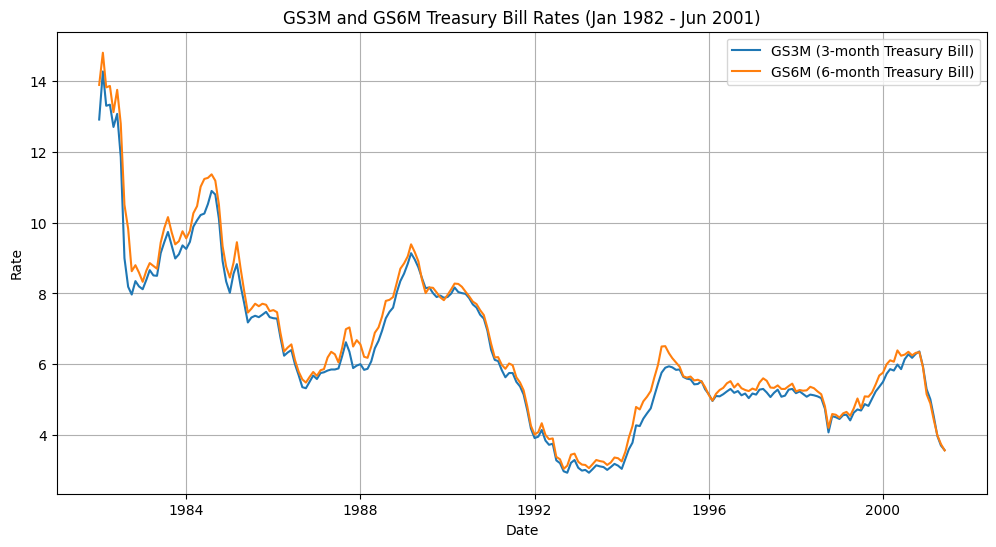


Unit Root Tests on Original Series:

ADF Test for GS3M:
ADF Statistic: -1.5391858164849086
p-value: 0.514045363282407
Critical Values:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348
GS3M is non-stationary (fail to reject null hypothesis).

KPSS Test for GS3M:
KPSS Statistic: 1.4539907692315281
p-value: 0.01
Lags: 9
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
GS3M is non-stationary (reject null hypothesis).

ADF Test for GS6M:
ADF Statistic: -3.7738194363438047
p-value: 0.003186826077188909
Critical Values:
	1%: -3.458854867412691
	5%: -2.8740800599399323
	10%: -2.573453223097503
GS6M is stationary (reject null hypothesis).

KPSS Test for GS6M:
KPSS Statistic: 1.4960862818466591
p-value: 0.01
Lags: 9
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
GS6M is non-stationary (reject null hypothesis).

Checking first differences for GS3M...

ADF Test for GS3M First Difference:
ADF Statistic: -5.573440308131572
p-value: 1.449964833

/tmp/ipython-input-443096358.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-443096358.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-443096358.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint
from google.colab import files

# Step 1: Upload the data file (assume it's an Excel file with columns 'obs', 'GS3M', 'GS6M')
print("Please upload the data file containing GS3M and GS6M rates.")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the data into a DataFrame
df = pd.read_excel(file_name)

# Strip any leading/trailing whitespace from 'obs'
df['obs'] = df['obs'].str.strip()

# Parse 'obs' to datetime and set as index
df['Date'] = pd.to_datetime(df['obs'], format='%Y:%m')
df.set_index('Date', inplace=True)
df.drop('obs', axis=1, inplace=True)

# Ensure the DataFrame has exactly 234 observations
if len(df) != 234:
    raise ValueError("The uploaded file must contain exactly 234 observations.")

# Step 2: Plot the two time series in the same diagram
plt.figure(figsize=(12, 6))
plt.plot(df['GS3M'], label='GS3M (3-month Treasury Bill)')
plt.plot(df['GS6M'], label='GS6M (6-month Treasury Bill)')
plt.title('GS3M and GS6M Treasury Bill Rates (Jan 1982 - Jun 2001)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Formal unit root analysis (Augmented Dickey-Fuller and KPSS tests) for stationarity
def perform_adf_test(series, name):
    result = adfuller(series)
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print(f'{name} is non-stationary (fail to reject null hypothesis).')
    else:
        print(f'{name} is stationary (reject null hypothesis).')
    return result[1] > 0.05

def perform_kpss_test(series, name):
    result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
    print(f'\nKPSS Test for {name}:')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Lags: {result[2]}')
    print(f'Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print(f'{name} is non-stationary (reject null hypothesis).')
    else:
        print(f'{name} is stationary (fail to reject null hypothesis).')
    return result[1] < 0.05  # Returns True if non-stationary

# Perform tests on original series
print("\nUnit Root Tests on Original Series:")
gs3m_adf_non_stat = perform_adf_test(df['GS3M'], 'GS3M')
gs3m_kpss_non_stat = perform_kpss_test(df['GS3M'], 'GS3M')

gs6m_adf_non_stat = perform_adf_test(df['GS6M'], 'GS6M')
gs6m_kpss_non_stat = perform_kpss_test(df['GS6M'], 'GS6M')

# Determine if I(1) based on both tests (ADF: non-stat, KPSS: non-stat)
gs3m_i1 = gs3m_adf_non_stat and gs3m_kpss_non_stat
gs6m_i1 = gs6m_adf_non_stat and gs6m_kpss_non_stat

# If non-stationary, check first differences
if gs3m_i1:
    print('\nChecking first differences for GS3M...')
    df['GS3M_diff'] = df['GS3M'].diff().dropna()
    perform_adf_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    perform_kpss_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')

if gs6m_i1:
    print('\nChecking first differences for GS6M...')
    df['GS6M_diff'] = df['GS6M'].diff().dropna()
    perform_adf_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    perform_kpss_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')

# Step 4: Test for cointegration (Engle-Granger test) if both are I(1)
if gs3m_i1 and gs6m_i1:
    print('\nPerforming Engle-Granger Cointegration Test...')
    score, p_value, _ = coint(df['GS3M'], df['GS6M'])
    print(f'Cointegration Test Statistic: {score}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The series are cointegrated (reject null hypothesis of no cointegration).')
    else:
        print('The series are not cointegrated (fail to reject null hypothesis).')
else:
    print('\nCointegration test requires both series to be non-stationary (I(1)). Skipping cointegration test.')

Please upload the data file containing GS3M and GS6M rates.


Saving Table 22.7 Gujarati.xlsx to Table 22.7 Gujarati (5).xlsx


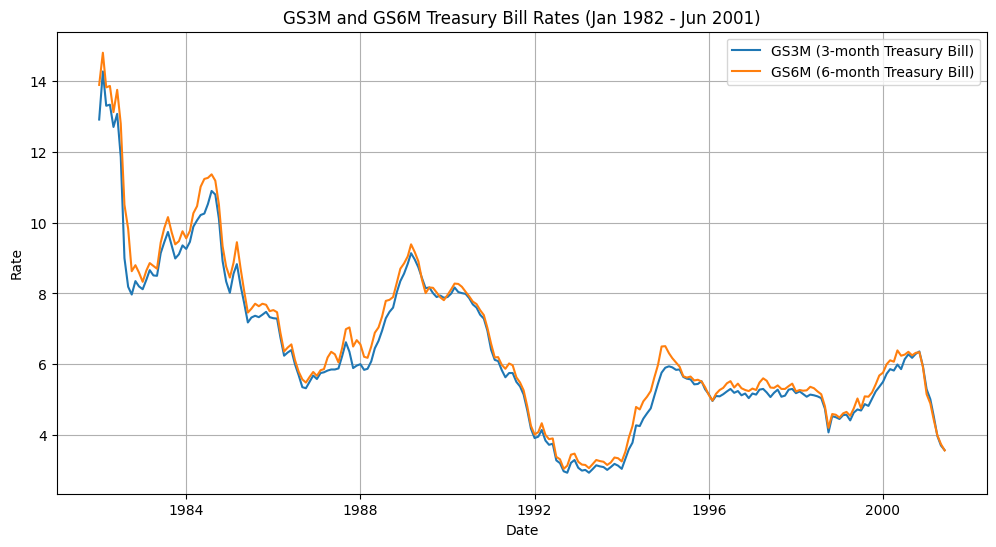


Correlograms and Autocorrelation Tests on Original Series:


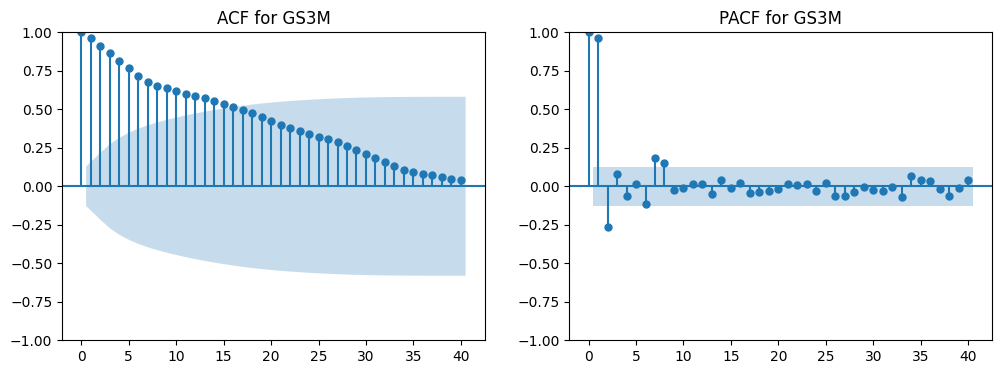


Ljung-Box Test for GS3M:
        lb_stat      lb_pvalue
1    220.613848   6.644901e-50
2    418.850510   1.116265e-91
3    597.120706  4.242119e-129
4    756.481438  2.046717e-162
5    898.579472  5.401936e-192
6   1022.847677  1.022538e-217
7   1133.840590  1.424915e-240
8   1237.986887  5.937129e-262
9   1336.955565  3.222733e-282
10  1430.834611  2.181073e-301
GS3M has autocorrelation (reject null hypothesis for at least one lag).


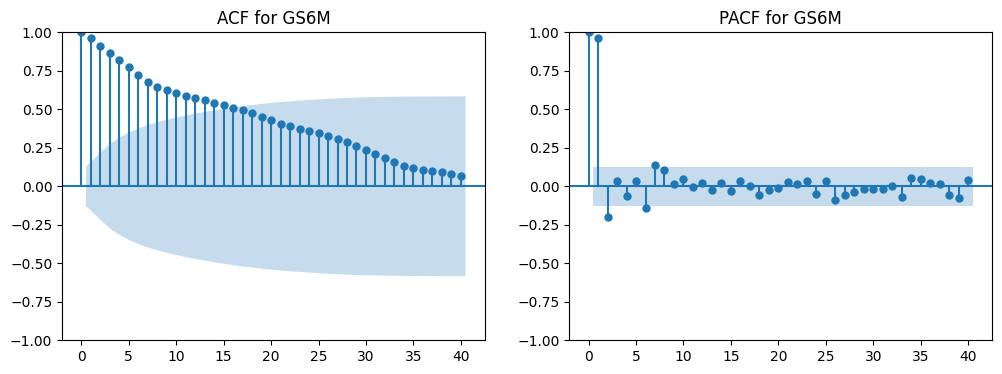


Ljung-Box Test for GS6M:
        lb_stat      lb_pvalue
1    219.991702   9.082252e-50
2    418.834283   1.125359e-91
3    598.356086  2.289658e-129
4    758.972412  5.909814e-163
5    902.899724  6.273883e-193
6   1028.760433  5.379446e-219
7   1140.369972  5.523002e-242
8   1242.845955  5.291014e-263
9   1338.087997  1.834869e-282
10  1428.108534  8.459055e-301
GS6M has autocorrelation (reject null hypothesis for at least one lag).

Unit Root Tests on Original Series:

ADF Test for GS3M:
ADF Statistic: -1.5391858164849086
p-value: 0.514045363282407
Critical Values:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348
GS3M is non-stationary (fail to reject null hypothesis).

KPSS Test for GS3M:
KPSS Statistic: 1.4539907692315281
p-value: 0.01
Lags: 9
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
GS3M is non-stationary (reject null hypothesis).

ADF Test for GS6M:
ADF Statistic: -3.7738194363438047
p-value: 0.003186826077188909
Critical Values:
	1

/tmp/ipython-input-974388345.py:81: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-974388345.py:81: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-974388345.py:81: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed


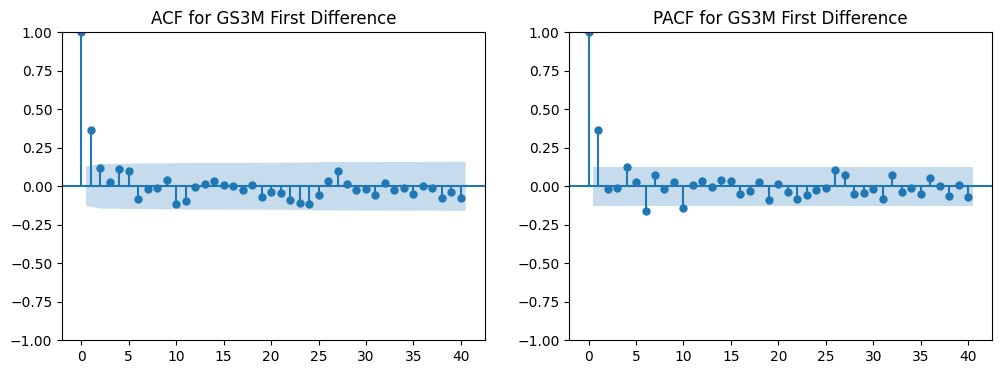


Ljung-Box Test for GS3M First Difference:
      lb_stat     lb_pvalue
1   31.128978  2.414399e-08
2   34.329287  3.511479e-08
3   34.523878  1.535708e-07
4   37.570330  1.374188e-07
5   40.054289  1.456192e-07
6   41.623768  2.181634e-07
7   41.725722  5.872072e-07
8   41.752182  1.507243e-06
9   42.173005  3.055661e-06
10  45.249795  1.960276e-06
GS3M First Difference has autocorrelation (reject null hypothesis for at least one lag).

Cointegration test requires both series to be non-stationary (I(1)). Skipping cointegration test.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import files

# Step 1: Upload the data file (assume it's an Excel file with columns 'obs', 'GS3M', 'GS6M')
print("Please upload the data file containing GS3M and GS6M rates.")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the data into a DataFrame
df = pd.read_excel(file_name)

# Strip any leading/trailing whitespace from 'obs'
df['obs'] = df['obs'].str.strip()

# Parse 'obs' to datetime and set as index
df['Date'] = pd.to_datetime(df['obs'], format='%Y:%m')
df.set_index('Date', inplace=True)
df.drop('obs', axis=1, inplace=True)

# Ensure the DataFrame has exactly 234 observations
if len(df) != 234:
    raise ValueError("The uploaded file must contain exactly 234 observations.")

# Step 2: Plot the two time series in the same diagram
plt.figure(figsize=(12, 6))
plt.plot(df['GS3M'], label='GS3M (3-month Treasury Bill)')
plt.plot(df['GS6M'], label='GS6M (6-month Treasury Bill)')
plt.title('GS3M and GS6M Treasury Bill Rates (Jan 1982 - Jun 2001)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Correlograms (ACF and PACF plots) and Ljung-Box test for autocorrelation
def plot_correlograms(series, name, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, ax=axes[0], lags=lags, title=f'ACF for {name}')
    plot_pacf(series, ax=axes[1], lags=lags, title=f'PACF for {name}')
    plt.show()

def perform_ljung_box_test(series, name, lags=10):
    result = acorr_ljungbox(series, lags=lags, return_df=True)
    print(f'\nLjung-Box Test for {name}:')
    print(result)
    if (result['lb_pvalue'] < 0.05).any():
        print(f'{name} has autocorrelation (reject null hypothesis for at least one lag).')
    else:
        print(f'{name} has no autocorrelation (fail to reject null hypothesis).')

# Plot correlograms and perform Ljung-Box on original series
print("\nCorrelograms and Autocorrelation Tests on Original Series:")
plot_correlograms(df['GS3M'], 'GS3M')
perform_ljung_box_test(df['GS3M'], 'GS3M')

plot_correlograms(df['GS6M'], 'GS6M')
perform_ljung_box_test(df['GS6M'], 'GS6M')

# Step 4: Formal unit root analysis (Augmented Dickey-Fuller and KPSS tests) for stationarity
def perform_adf_test(series, name):
    result = adfuller(series)
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print(f'{name} is non-stationary (fail to reject null hypothesis).')
    else:
        print(f'{name} is stationary (reject null hypothesis).')
    return result[1] > 0.05

def perform_kpss_test(series, name):
    result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
    print(f'\nKPSS Test for {name}:')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Lags: {result[2]}')
    print(f'Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print(f'{name} is non-stationary (reject null hypothesis).')
    else:
        print(f'{name} is stationary (fail to reject null hypothesis).')
    return result[1] < 0.05  # Returns True if non-stationary

# Perform unit root tests on original series
print("\nUnit Root Tests on Original Series:")
gs3m_adf_non_stat = perform_adf_test(df['GS3M'], 'GS3M')
gs3m_kpss_non_stat = perform_kpss_test(df['GS3M'], 'GS3M')

gs6m_adf_non_stat = perform_adf_test(df['GS6M'], 'GS6M')
gs6m_kpss_non_stat = perform_kpss_test(df['GS6M'], 'GS6M')

# Determine if I(1) based on both tests (ADF: non-stat, KPSS: non-stat)
gs3m_i1 = gs3m_adf_non_stat and gs3m_kpss_non_stat
gs6m_i1 = gs6m_adf_non_stat and gs6m_kpss_non_stat

# If non-stationary, check first differences
if gs3m_i1:
    print('\nChecking first differences for GS3M...')
    df['GS3M_diff'] = df['GS3M'].diff().dropna()
    perform_adf_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    perform_kpss_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    plot_correlograms(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    perform_ljung_box_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')

if gs6m_i1:
    print('\nChecking first differences for GS6M...')
    df['GS6M_diff'] = df['GS6M'].diff().dropna()
    perform_adf_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    perform_kpss_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    plot_correlograms(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    perform_ljung_box_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')

# Step 5: Test for cointegration (Engle-Granger test) if both are I(1)
if gs3m_i1 and gs6m_i1:
    print('\nPerforming Engle-Granger Cointegration Test...')
    score, p_value, _ = coint(df['GS3M'], df['GS6M'])
    print(f'Cointegration Test Statistic: {score}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The series are cointegrated (reject null hypothesis of no cointegration).')
    else:
        print('The series are not cointegrated (fail to reject null hypothesis).')
else:
    print('\nCointegration test requires both series to be non-stationary (I(1)). Skipping cointegration test.')

Please upload the data file containing GS3M and GS6M rates.


Saving Table 22.7 Gujarati.xlsx to Table 22.7 Gujarati (6).xlsx


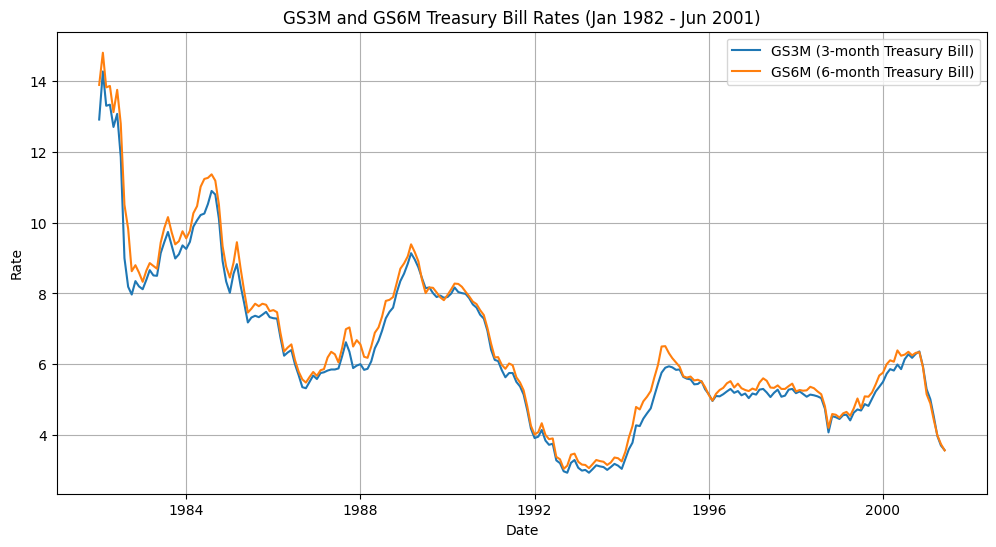


Correlograms and Autocorrelation Tests on Original Series:


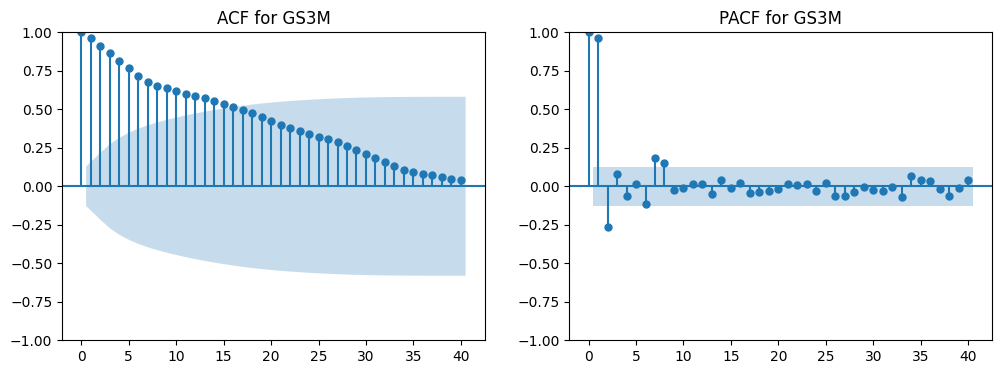


Ljung-Box Test for GS3M:
        lb_stat      lb_pvalue
1    220.613848   6.644901e-50
2    418.850510   1.116265e-91
3    597.120706  4.242119e-129
4    756.481438  2.046717e-162
5    898.579472  5.401936e-192
6   1022.847677  1.022538e-217
7   1133.840590  1.424915e-240
8   1237.986887  5.937129e-262
9   1336.955565  3.222733e-282
10  1430.834611  2.181073e-301
GS3M has autocorrelation (reject null hypothesis for at least one lag).


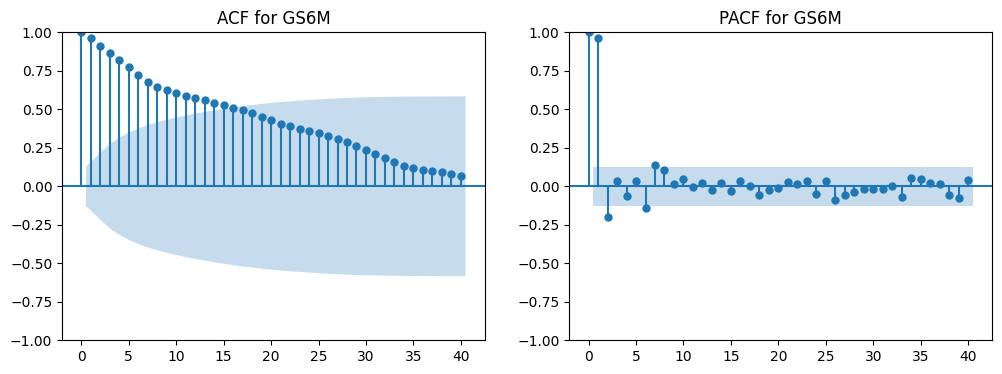


Ljung-Box Test for GS6M:
        lb_stat      lb_pvalue
1    219.991702   9.082252e-50
2    418.834283   1.125359e-91
3    598.356086  2.289658e-129
4    758.972412  5.909814e-163
5    902.899724  6.273883e-193
6   1028.760433  5.379446e-219
7   1140.369972  5.523002e-242
8   1242.845955  5.291014e-263
9   1338.087997  1.834869e-282
10  1428.108534  8.459055e-301
GS6M has autocorrelation (reject null hypothesis for at least one lag).

Unit Root Tests on Original Series:

ADF Test for GS3M:
ADF Statistic: -1.5391858164849086
p-value: 0.514045363282407
Critical Values:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348
GS3M is non-stationary (fail to reject null hypothesis).

KPSS Test for GS3M:
KPSS Statistic: 1.4539907692315281
p-value: 0.01
Lags: 9
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
GS3M is non-stationary (reject null hypothesis).

ADF Test for GS6M:
ADF Statistic: -3.7738194363438047
p-value: 0.003186826077188909
Critical Values:
	1

/tmp/ipython-input-3559161659.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-3559161659.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-3559161659.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed


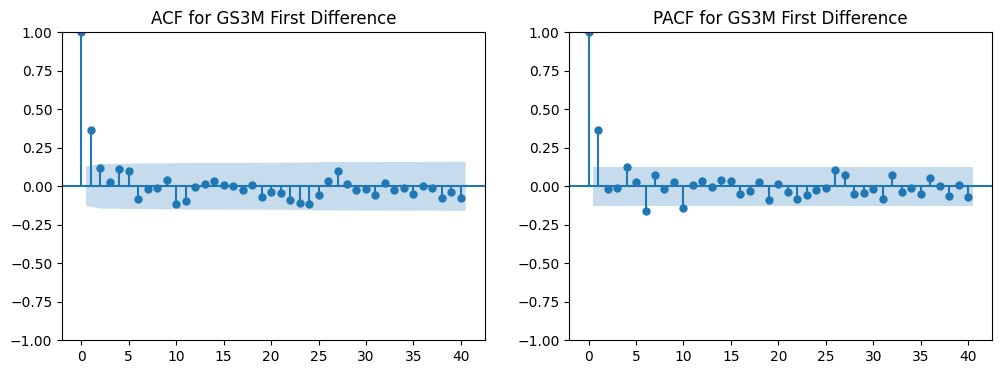


Ljung-Box Test for GS3M First Difference:
      lb_stat     lb_pvalue
1   31.128978  2.414399e-08
2   34.329287  3.511479e-08
3   34.523878  1.535708e-07
4   37.570330  1.374188e-07
5   40.054289  1.456192e-07
6   41.623768  2.181634e-07
7   41.725722  5.872072e-07
8   41.752182  1.507243e-06
9   42.173005  3.055661e-06
10  45.249795  1.960276e-06
GS3M First Difference has autocorrelation (reject null hypothesis for at least one lag).

Cointegration test requires both series to be non-stationary (I(1)). Skipping cointegration test.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from google.colab import files

# Step 1: Upload the data file (assume it's an Excel file with columns 'obs', 'GS3M', 'GS6M')
print("Please upload the data file containing GS3M and GS6M rates.")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the data into a DataFrame
df = pd.read_excel(file_name)

# Strip any leading/trailing whitespace from 'obs'
df['obs'] = df['obs'].str.strip()

# Parse 'obs' to datetime and set as index
df['Date'] = pd.to_datetime(df['obs'], format='%Y:%m')
df.set_index('Date', inplace=True)
df.drop('obs', axis=1, inplace=True)

# Ensure the DataFrame has exactly 234 observations
if len(df) != 234:
    raise ValueError("The uploaded file must contain exactly 234 observations.")

# Step 2: Plot the two time series in the same diagram
plt.figure(figsize=(12, 6))
plt.plot(df['GS3M'], label='GS3M (3-month Treasury Bill)')
plt.plot(df['GS6M'], label='GS6M (6-month Treasury Bill)')
plt.title('GS3M and GS6M Treasury Bill Rates (Jan 1982 - Jun 2001)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Correlograms (ACF and PACF plots) and Ljung-Box test for autocorrelation
def plot_correlograms(series, name, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, ax=axes[0], lags=lags, title=f'ACF for {name}')
    plot_pacf(series, ax=axes[1], lags=lags, title=f'PACF for {name}')
    plt.show()

def perform_ljung_box_test(series, name, lags=10):
    result = acorr_ljungbox(series, lags=lags, return_df=True)
    print(f'\nLjung-Box Test for {name}:')
    print(result)
    if (result['lb_pvalue'] < 0.05).any():
        print(f'{name} has autocorrelation (reject null hypothesis for at least one lag).')
    else:
        print(f'{name} has no autocorrelation (fail to reject null hypothesis).')

# Plot correlograms and perform Ljung-Box on original series
print("\nCorrelograms and Autocorrelation Tests on Original Series:")
plot_correlograms(df['GS3M'], 'GS3M')
perform_ljung_box_test(df['GS3M'], 'GS3M')

plot_correlograms(df['GS6M'], 'GS6M')
perform_ljung_box_test(df['GS6M'], 'GS6M')

# Step 4: Formal unit root analysis (Augmented Dickey-Fuller and KPSS tests) for stationarity
def perform_adf_test(series, name):
    result = adfuller(series)
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print(f'{name} is non-stationary (fail to reject null hypothesis).')
    else:
        print(f'{name} is stationary (reject null hypothesis).')
    return result[1] > 0.05

def perform_kpss_test(series, name):
    result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
    print(f'\nKPSS Test for {name}:')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Lags: {result[2]}')
    print(f'Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print(f'{name} is non-stationary (reject null hypothesis).')
    else:
        print(f'{name} is stationary (fail to reject null hypothesis).')
    return result[1] < 0.05  # Returns True if non-stationary

# Perform unit root tests on original series
print("\nUnit Root Tests on Original Series:")
gs3m_adf_non_stat = perform_adf_test(df['GS3M'], 'GS3M')
gs3m_kpss_non_stat = perform_kpss_test(df['GS3M'], 'GS3M')

gs6m_adf_non_stat = perform_adf_test(df['GS6M'], 'GS6M')
gs6m_kpss_non_stat = perform_kpss_test(df['GS6M'], 'GS6M')

# Determine if I(1) based on both tests (ADF: non-stat, KPSS: non-stat)
gs3m_i1 = gs3m_adf_non_stat and gs3m_kpss_non_stat
gs6m_i1 = gs6m_adf_non_stat and gs6m_kpss_non_stat

# If non-stationary, check first differences
if gs3m_i1:
    print('\nChecking first differences for GS3M...')
    df['GS3M_diff'] = df['GS3M'].diff().dropna()
    perform_adf_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    perform_kpss_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    plot_correlograms(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    perform_ljung_box_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')

if gs6m_i1:
    print('\nChecking first differences for GS6M...')
    df['GS6M_diff'] = df['GS6M'].diff().dropna()
    perform_adf_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    perform_kpss_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    plot_correlograms(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    perform_ljung_box_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')

# Step 5: Test for cointegration if both are I(1)
if gs3m_i1 and gs6m_i1:
    print('\nPerforming Engle-Granger Cointegration Test...')
    score, p_value, _ = coint(df['GS3M'], df['GS6M'])
    print(f'Cointegration Test Statistic: {score}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The series are cointegrated (reject null hypothesis of no cointegration).')
    else:
        print('The series are not cointegrated (fail to reject null hypothesis).')

    print('\nPerforming Johansen Cointegration Test...')
    data = df[['GS3M', 'GS6M']].values
    johansen_result = coint_johansen(data, det_order=0, k_ar_diff=1)
    print('Eigenvalues:')
    print(johansen_result.eig)
    print('\nTrace Statistics:')
    print(johansen_result.lr1)
    print('\nCritical Values (90%, 95%, 99%):')
    print(johansen_result.cvt)
    print('\nMax Eigen Statistics:')
    print(johansen_result.lr2)
    print('\nCritical Values (90%, 95%, 99%):')
    print(johansen_result.cvm)

    # Interpretation for cointegration rank
    ranks = [0, 1]  # For two series, r=0 and r=1
    for i in range(len(ranks)):
        if johansen_result.lr1[i] > johansen_result.cvt[i, 1]:  # 95% critical value
            print(f'At r <= {i}, reject null (trace test): evidence of at least {i+1} cointegrating relations.')
        else:
            print(f'At r <= {i}, fail to reject null (trace test).')
        if johansen_result.lr2[i] > johansen_result.cvm[i, 1]:  # 95% critical value
            print(f'At r = {i}, reject null (max eigen test): evidence of cointegrating rank {i+1}.')
        else:
            print(f'At r = {i}, fail to reject null (max eigen test).')
else:
    print('\nCointegration test requires both series to be non-stationary (I(1)). Skipping cointegration test.')

Please upload the data file containing GS3M and GS6M rates.


Saving Table 22.7 Gujarati.xlsx to Table 22.7 Gujarati (7).xlsx


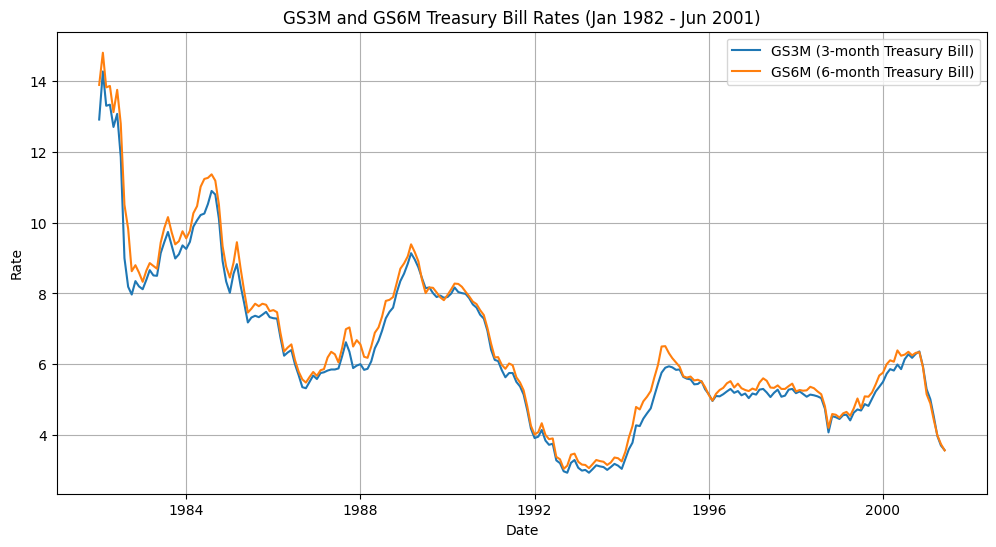


Correlograms and Autocorrelation Tests on Original Series:


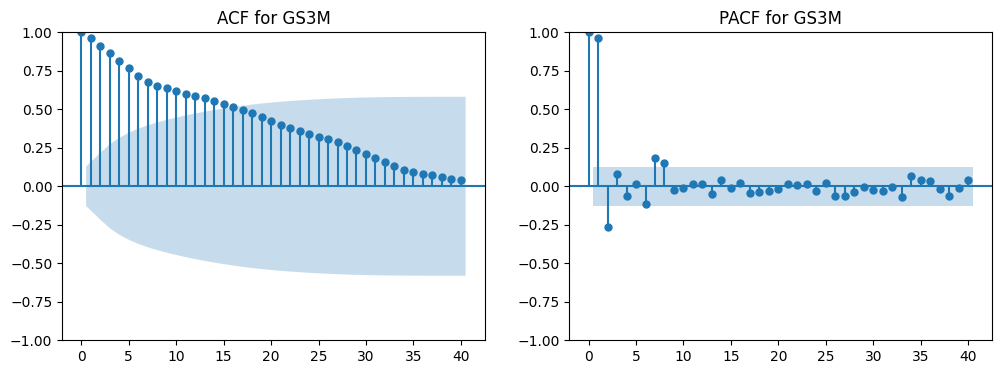


Ljung-Box Test for GS3M:
        lb_stat      lb_pvalue
1    220.613848   6.644901e-50
2    418.850510   1.116265e-91
3    597.120706  4.242119e-129
4    756.481438  2.046717e-162
5    898.579472  5.401936e-192
6   1022.847677  1.022538e-217
7   1133.840590  1.424915e-240
8   1237.986887  5.937129e-262
9   1336.955565  3.222733e-282
10  1430.834611  2.181073e-301
GS3M has autocorrelation (reject null hypothesis for at least one lag).


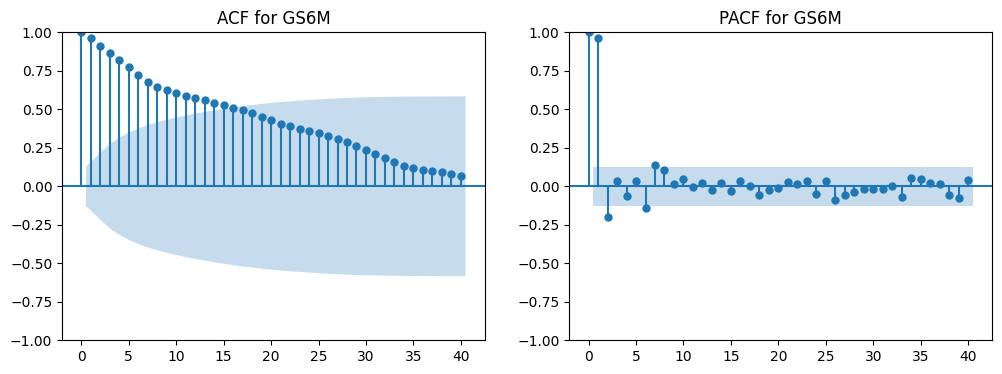


Ljung-Box Test for GS6M:
        lb_stat      lb_pvalue
1    219.991702   9.082252e-50
2    418.834283   1.125359e-91
3    598.356086  2.289658e-129
4    758.972412  5.909814e-163
5    902.899724  6.273883e-193
6   1028.760433  5.379446e-219
7   1140.369972  5.523002e-242
8   1242.845955  5.291014e-263
9   1338.087997  1.834869e-282
10  1428.108534  8.459055e-301
GS6M has autocorrelation (reject null hypothesis for at least one lag).

Unit Root Tests on Original Series:

ADF Test for GS3M:
ADF Statistic: -1.5391858164849086
p-value: 0.514045363282407
Critical Values:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348
GS3M is non-stationary (fail to reject null hypothesis).

KPSS Test for GS3M:
KPSS Statistic: 1.4539907692315281
p-value: 0.01
Lags: 9
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
GS3M is non-stationary (reject null hypothesis).

ADF Test for GS6M:
ADF Statistic: -3.7738194363438047
p-value: 0.003186826077188909
Critical Values:
	1

/tmp/ipython-input-2784460980.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-2784460980.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-2784460980.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed


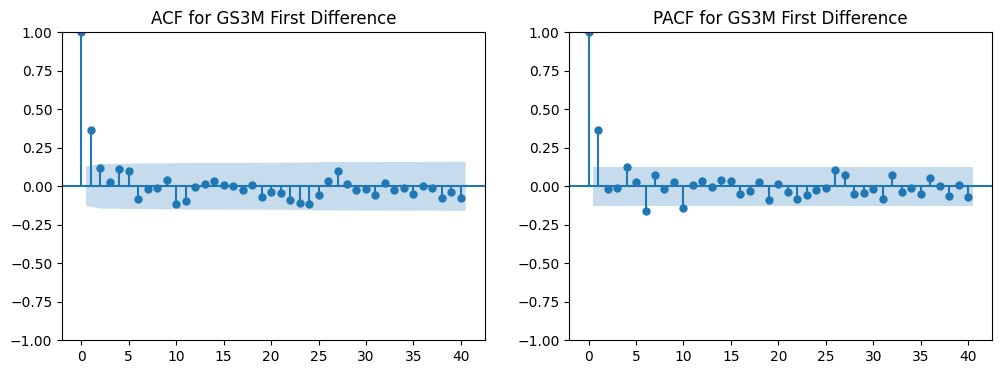


Ljung-Box Test for GS3M First Difference:
      lb_stat     lb_pvalue
1   31.128978  2.414399e-08
2   34.329287  3.511479e-08
3   34.523878  1.535708e-07
4   37.570330  1.374188e-07
5   40.054289  1.456192e-07
6   41.623768  2.181634e-07
7   41.725722  5.872072e-07
8   41.752182  1.507243e-06
9   42.173005  3.055661e-06
10  45.249795  1.960276e-06
GS3M First Difference has autocorrelation (reject null hypothesis for at least one lag).

Cointegration test requires both series to be non-stationary (I(1)). Skipping cointegration test.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from google.colab import files

# Step 1: Upload the data file (assume it's an Excel file with columns 'obs', 'GS3M', 'GS6M')
print("Please upload the data file containing GS3M and GS6M rates.")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the data into a DataFrame
df = pd.read_excel(file_name)

# Strip any leading/trailing whitespace from 'obs'
df['obs'] = df['obs'].str.strip()

# Parse 'obs' to datetime and set as index
df['Date'] = pd.to_datetime(df['obs'], format='%Y:%m')
df.set_index('Date', inplace=True)
df.drop('obs', axis=1, inplace=True)

# Ensure the DataFrame has exactly 234 observations
if len(df) != 234:
    raise ValueError("The uploaded file must contain exactly 234 observations.")

# Step 2: Plot the two time series in the same diagram
plt.figure(figsize=(12, 6))
plt.plot(df['GS3M'], label='GS3M (3-month Treasury Bill)')
plt.plot(df['GS6M'], label='GS6M (6-month Treasury Bill)')
plt.title('GS3M and GS6M Treasury Bill Rates (Jan 1982 - Jun 2001)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Correlograms (ACF and PACF plots) and Ljung-Box test for autocorrelation
def plot_correlograms(series, name, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, ax=axes[0], lags=lags, title=f'ACF for {name}')
    plot_pacf(series, ax=axes[1], lags=lags, title=f'PACF for {name}')
    plt.show()

def perform_ljung_box_test(series, name, lags=10):
    result = acorr_ljungbox(series, lags=lags, return_df=True)
    print(f'\nLjung-Box Test for {name}:')
    print(result)
    if (result['lb_pvalue'] < 0.05).any():
        print(f'{name} has autocorrelation (reject null hypothesis for at least one lag).')
    else:
        print(f'{name} has no autocorrelation (fail to reject null hypothesis).')

# Plot correlograms and perform Ljung-Box on original series
print("\nCorrelograms and Autocorrelation Tests on Original Series:")
plot_correlograms(df['GS3M'], 'GS3M')
perform_ljung_box_test(df['GS3M'], 'GS3M')

plot_correlograms(df['GS6M'], 'GS6M')
perform_ljung_box_test(df['GS6M'], 'GS6M')

# Step 4: Formal unit root analysis (Augmented Dickey-Fuller and KPSS tests) for stationarity
def perform_adf_test(series, name):
    result = adfuller(series)
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print(f'{name} is non-stationary (fail to reject null hypothesis).')
    else:
        print(f'{name} is stationary (reject null hypothesis).')
    return result[1] > 0.05

def perform_kpss_test(series, name):
    result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
    print(f'\nKPSS Test for {name}:')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Lags: {result[2]}')
    print(f'Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print(f'{name} is non-stationary (reject null hypothesis).')
    else:
        print(f'{name} is stationary (fail to reject null hypothesis).')
    return result[1] < 0.05  # Returns True if non-stationary

# Perform unit root tests on original series
print("\nUnit Root Tests on Original Series:")
gs3m_adf_non_stat = perform_adf_test(df['GS3M'], 'GS3M')
gs3m_kpss_non_stat = perform_kpss_test(df['GS3M'], 'GS3M')

gs6m_adf_non_stat = perform_adf_test(df['GS6M'], 'GS6M')
gs6m_kpss_non_stat = perform_kpss_test(df['GS6M'], 'GS6M')

# Determine if I(1) based on both tests (ADF: non-stat, KPSS: non-stat)
gs3m_i1 = gs3m_adf_non_stat and gs3m_kpss_non_stat
gs6m_i1 = gs6m_adf_non_stat and gs6m_kpss_non_stat

# If non-stationary, check first differences
if gs3m_i1:
    print('\nChecking first differences for GS3M...')
    df['GS3M_diff'] = df['GS3M'].diff().dropna()
    perform_adf_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    perform_kpss_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    plot_correlograms(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    perform_ljung_box_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')

if gs6m_i1:
    print('\nChecking first differences for GS6M...')
    df['GS6M_diff'] = df['GS6M'].diff().dropna()
    perform_adf_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    perform_kpss_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    plot_correlograms(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    perform_ljung_box_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')

# Step 5: Test for cointegration if both are I(1)
if gs3m_i1 and gs6m_i1:
    print('\nPerforming Engle-Granger Cointegration Test...')
    score, p_value, _ = coint(df['GS3M'], df['GS6M'])
    print(f'Cointegration Test Statistic: {score}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The series are cointegrated (reject null hypothesis of no cointegration).')
    else:
        print('The series are not cointegrated (fail to reject null hypothesis).')

    print('\nPerforming Johansen Cointegration Test...')
    data = df[['GS3M', 'GS6M']].values
    johansen_result = coint_johansen(data, det_order=0, k_ar_diff=1)
    print('Eigenvalues:')
    print(johansen_result.eig)
    print('\nTrace Statistics:')
    print(johansen_result.lr1)
    print('\nCritical Values (90%, 95%, 99%):')
    print(johansen_result.cvt)
    print('\nMax Eigen Statistics:')
    print(johansen_result.lr2)
    print('\nCritical Values (90%, 95%, 99%):')
    print(johansen_result.cvm)

    # Interpretation for cointegration rank at 5% significance level
    trace_crit = johansen_result.cvt[:, 1]  # 95% critical values for trace
    max_eig_crit = johansen_result.cvm[:, 1]  # 95% critical values for max eig

    rank = 0
    for i in range(len(johansen_result.lr1)):
        if johansen_result.lr1[i] > trace_crit[i]:
            rank = i + 1
    print(f'\nEstimated cointegration rank (trace test): {rank}')

    rank = 0
    for i in range(len(johansen_result.lr2)):
        if johansen_result.lr2[i] > max_eig_crit[i]:
            rank = i + 1
        else:
            break
    print(f'Estimated cointegration rank (max eigen test): {rank}')
else:
    print('\nCointegration test requires both series to be non-stationary (I(1)). Skipping cointegration test.')

Please upload the data file containing GS3M and GS6M rates.


Saving Table 22.7 Gujarati.xlsx to Table 22.7 Gujarati (8).xlsx


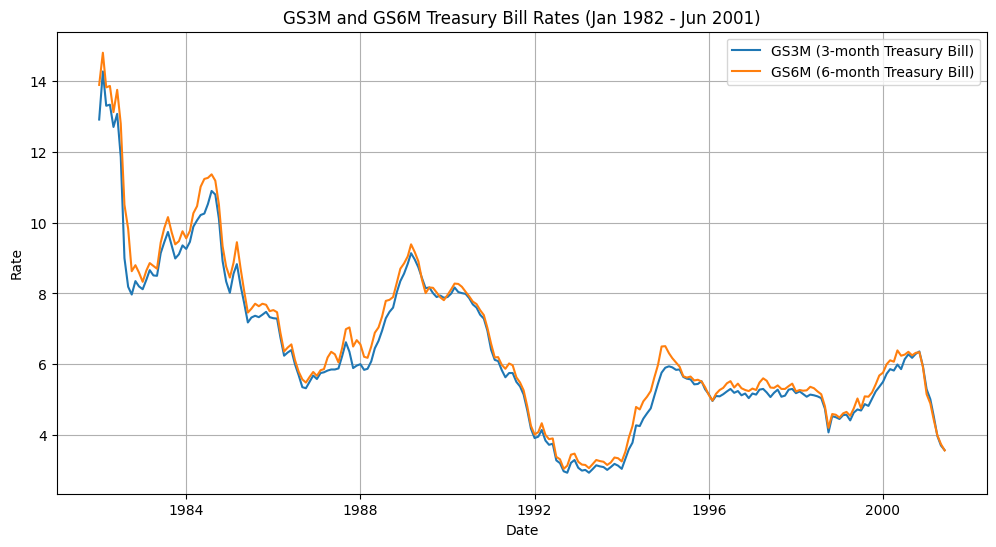


Correlograms and Autocorrelation Tests on Original Series:


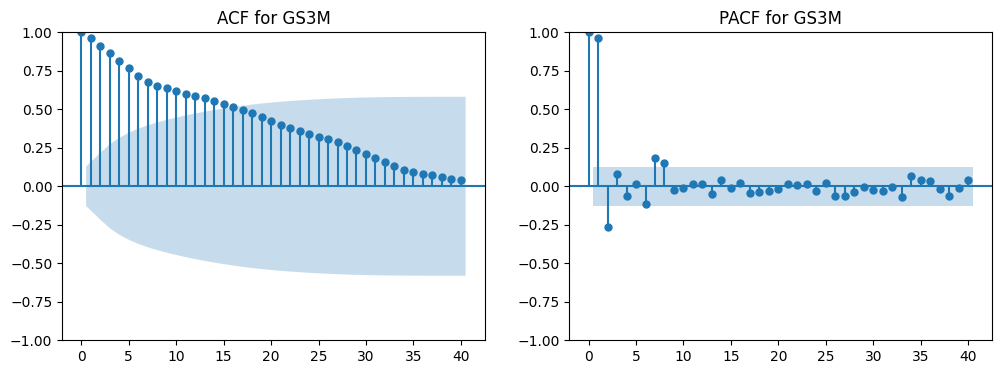


Ljung-Box Test for GS3M:
        lb_stat      lb_pvalue
1    220.613848   6.644901e-50
2    418.850510   1.116265e-91
3    597.120706  4.242119e-129
4    756.481438  2.046717e-162
5    898.579472  5.401936e-192
6   1022.847677  1.022538e-217
7   1133.840590  1.424915e-240
8   1237.986887  5.937129e-262
9   1336.955565  3.222733e-282
10  1430.834611  2.181073e-301
GS3M has autocorrelation (reject null hypothesis for at least one lag).


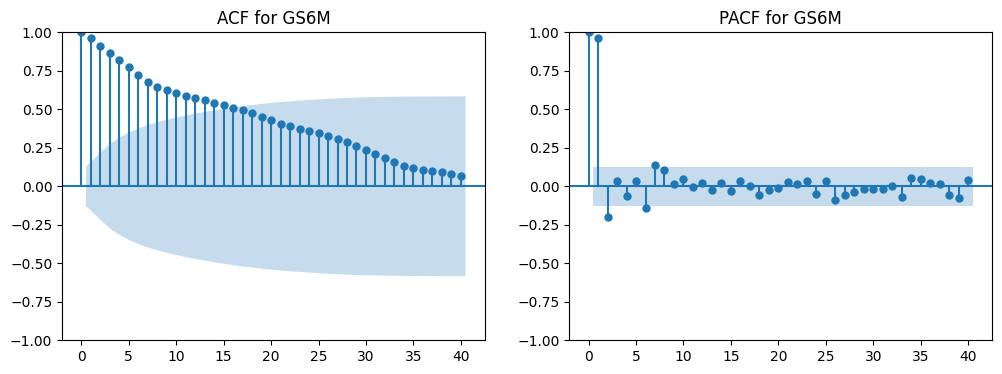


Ljung-Box Test for GS6M:
        lb_stat      lb_pvalue
1    219.991702   9.082252e-50
2    418.834283   1.125359e-91
3    598.356086  2.289658e-129
4    758.972412  5.909814e-163
5    902.899724  6.273883e-193
6   1028.760433  5.379446e-219
7   1140.369972  5.523002e-242
8   1242.845955  5.291014e-263
9   1338.087997  1.834869e-282
10  1428.108534  8.459055e-301
GS6M has autocorrelation (reject null hypothesis for at least one lag).

Unit Root Tests on Original Series:

ADF Test for GS3M:
ADF Statistic: -1.5391858164849086
p-value: 0.514045363282407
Critical Values:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348
GS3M is non-stationary (fail to reject null hypothesis).

KPSS Test for GS3M:
KPSS Statistic: 1.4539907692315281
p-value: 0.01
Lags: 9
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
GS3M is non-stationary (reject null hypothesis).

ADF Test for GS6M:
ADF Statistic: -3.7738194363438047
p-value: 0.003186826077188909
Critical Values:
	1

/tmp/ipython-input-661865677.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-661865677.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
/tmp/ipython-input-661865677.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed


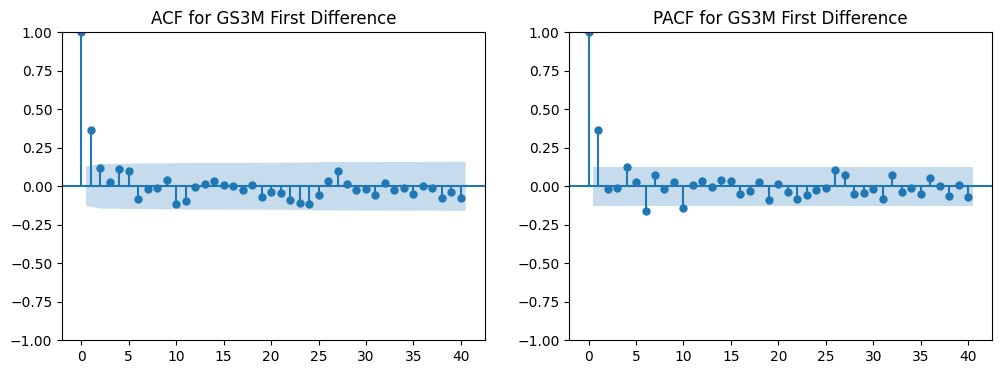


Ljung-Box Test for GS3M First Difference:
      lb_stat     lb_pvalue
1   31.128978  2.414399e-08
2   34.329287  3.511479e-08
3   34.523878  1.535708e-07
4   37.570330  1.374188e-07
5   40.054289  1.456192e-07
6   41.623768  2.181634e-07
7   41.725722  5.872072e-07
8   41.752182  1.507243e-06
9   42.173005  3.055661e-06
10  45.249795  1.960276e-06
GS3M First Difference has autocorrelation (reject null hypothesis for at least one lag).

Checking first differences for GS6M...

ADF Test for GS6M First Difference:
ADF Statistic: -7.98179332631351
p-value: 2.6115016215903995e-12
Critical Values:
	1%: -3.4589796764641
	5%: -2.8741347158661448
	10%: -2.573482381701992
GS6M First Difference is stationary (reject null hypothesis).

KPSS Test for GS6M First Difference:
KPSS Statistic: 0.16088141007269396
p-value: 0.1
Lags: 6
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
GS6M First Difference is stationary (fail to reject null hypothesis).


/tmp/ipython-input-661865677.py:82: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed


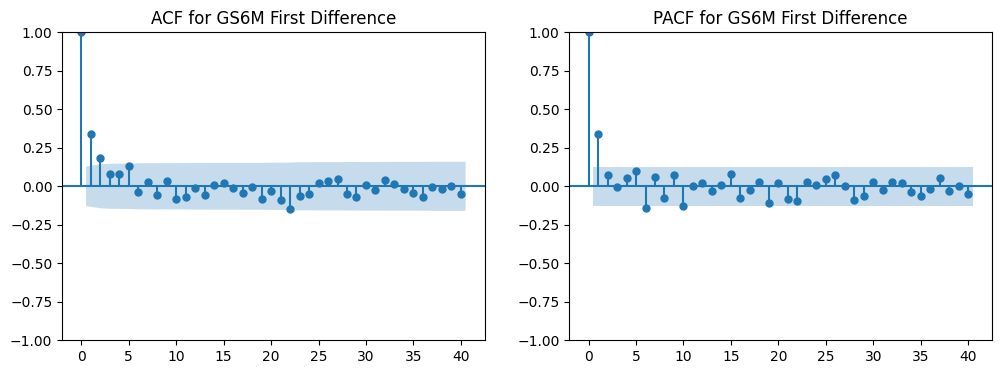


Ljung-Box Test for GS6M First Difference:
      lb_stat     lb_pvalue
1   27.223837  1.812107e-07
2   34.945826  2.579944e-08
3   36.466678  5.966281e-08
4   38.088900  1.074223e-07
5   42.312563  5.091899e-08
6   42.697612  1.338686e-07
7   42.871178  3.532218e-07
8   43.642072  6.647624e-07
9   43.980590  1.423104e-06
10  45.548197  1.731384e-06
GS6M First Difference has autocorrelation (reject null hypothesis for at least one lag).

Performing Engle-Granger Cointegration Test...
Cointegration Test Statistic: -4.736701413993589
p-value: 0.00048712423925656564
The series are cointegrated (reject null hypothesis of no cointegration).

Performing Johansen Cointegration Test...
Eigenvalues:
[0.14867232 0.06269956]

Trace Statistics:
[52.36462346 15.02232689]

Critical Values (90%, 95%, 99%):
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Max Eigen Statistics:
[37.34229657 15.02232689]

Critical Values (90%, 95%, 99%):
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]

Esti

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from google.colab import files

# Step 1: Upload the data file (assume it's an Excel file with columns 'obs', 'GS3M', 'GS6M')
print("Please upload the data file containing GS3M and GS6M rates.")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the data into a DataFrame
df = pd.read_excel(file_name)

# Strip any leading/trailing whitespace from 'obs'
df['obs'] = df['obs'].str.strip()

# Parse 'obs' to datetime and set as index
df['Date'] = pd.to_datetime(df['obs'], format='%Y:%m')
df.set_index('Date', inplace=True)
df.drop('obs', axis=1, inplace=True)

# Ensure the DataFrame has exactly 234 observations
if len(df) != 234:
    raise ValueError("The uploaded file must contain exactly 234 observations.")

# Step 2: Plot the two time series in the same diagram
plt.figure(figsize=(12, 6))
plt.plot(df['GS3M'], label='GS3M (3-month Treasury Bill)')
plt.plot(df['GS6M'], label='GS6M (6-month Treasury Bill)')
plt.title('GS3M and GS6M Treasury Bill Rates (Jan 1982 - Jun 2001)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Correlograms (ACF and PACF plots) and Ljung-Box test for autocorrelation
def plot_correlograms(series, name, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, ax=axes[0], lags=lags, title=f'ACF for {name}')
    plot_pacf(series, ax=axes[1], lags=lags, title=f'PACF for {name}')
    plt.show()

def perform_ljung_box_test(series, name, lags=10):
    result = acorr_ljungbox(series, lags=lags, return_df=True)
    print(f'\nLjung-Box Test for {name}:')
    print(result)
    if (result['lb_pvalue'] < 0.05).any():
        print(f'{name} has autocorrelation (reject null hypothesis for at least one lag).')
    else:
        print(f'{name} has no autocorrelation (fail to reject null hypothesis).')

# Plot correlograms and perform Ljung-Box on original series
print("\nCorrelograms and Autocorrelation Tests on Original Series:")
plot_correlograms(df['GS3M'], 'GS3M')
perform_ljung_box_test(df['GS3M'], 'GS3M')

plot_correlograms(df['GS6M'], 'GS6M')
perform_ljung_box_test(df['GS6M'], 'GS6M')

# Step 4: Formal unit root analysis (Augmented Dickey-Fuller and KPSS tests) for stationarity
def perform_adf_test(series, name):
    result = adfuller(series)
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print(f'{name} is non-stationary (fail to reject null hypothesis).')
    else:
        print(f'{name} is stationary (reject null hypothesis).')
    return result[1] > 0.05

def perform_kpss_test(series, name):
    result = kpss(series, regression='c')  # 'c' for constant, can use 'ct' for constant and trend if needed
    print(f'\nKPSS Test for {name}:')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Lags: {result[2]}')
    print(f'Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print(f'{name} is non-stationary (reject null hypothesis).')
    else:
        print(f'{name} is stationary (fail to reject null hypothesis).')
    return result[1] < 0.05  # Returns True if non-stationary

# Perform unit root tests on original series
print("\nUnit Root Tests on Original Series:")
perform_adf_test(df['GS3M'], 'GS3M')
gs3m_kpss_non_stat = perform_kpss_test(df['GS3M'], 'GS3M')

perform_adf_test(df['GS6M'], 'GS6M')
gs6m_kpss_non_stat = perform_kpss_test(df['GS6M'], 'GS6M')

# Use KPSS results for determining non-stationarity, as per user indication
gs3m_i1 = gs3m_kpss_non_stat
gs6m_i1 = gs6m_kpss_non_stat

# If non-stationary by KPSS, check first differences
if gs3m_i1:
    print('\nChecking first differences for GS3M...')
    df['GS3M_diff'] = df['GS3M'].diff().dropna()
    perform_adf_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    perform_kpss_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    plot_correlograms(df['GS3M_diff'].dropna(), 'GS3M First Difference')
    perform_ljung_box_test(df['GS3M_diff'].dropna(), 'GS3M First Difference')

if gs6m_i1:
    print('\nChecking first differences for GS6M...')
    df['GS6M_diff'] = df['GS6M'].diff().dropna()
    perform_adf_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    perform_kpss_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    plot_correlograms(df['GS6M_diff'].dropna(), 'GS6M First Difference')
    perform_ljung_box_test(df['GS6M_diff'].dropna(), 'GS6M First Difference')

# Step 5: Test for cointegration if both are non-stationary by KPSS (I(1) assumption based on KPSS)
if gs3m_i1 and gs6m_i1:
    print('\nPerforming Engle-Granger Cointegration Test...')
    score, p_value, _ = coint(df['GS3M'], df['GS6M'])
    print(f'Cointegration Test Statistic: {score}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The series are cointegrated (reject null hypothesis of no cointegration).')
    else:
        print('The series are not cointegrated (fail to reject null hypothesis).')

    print('\nPerforming Johansen Cointegration Test...')
    data = df[['GS3M', 'GS6M']].values
    johansen_result = coint_johansen(data, det_order=0, k_ar_diff=1)
    print('Eigenvalues:')
    print(johansen_result.eig)
    print('\nTrace Statistics:')
    print(johansen_result.lr1)
    print('\nCritical Values (90%, 95%, 99%):')
    print(johansen_result.cvt)
    print('\nMax Eigen Statistics:')
    print(johansen_result.lr2)
    print('\nCritical Values (90%, 95%, 99%):')
    print(johansen_result.cvm)

    # Interpretation for cointegration rank at 5% significance level
    trace_crit = johansen_result.cvt[:, 1]  # 95% critical values for trace
    max_eig_crit = johansen_result.cvm[:, 1]  # 95% critical values for max eig

    rank_trace = 0
    for i in range(len(johansen_result.lr1)):
        if johansen_result.lr1[i] > trace_crit[i]:
            rank_trace = i + 1

    rank_max = 0
    for i in range(len(johansen_result.lr2)):
        if johansen_result.lr2[i] > max_eig_crit[i]:
            rank_max = i + 1
        else:
            break

    print(f'\nEstimated cointegration rank (trace test): {rank_trace}')
    print(f'Estimated cointegration rank (max eigen test): {rank_max}')
else:
    print('\nCointegration test requires both series to be non-stationary by KPSS (I(1)). Skipping cointegration test.')


Liga Grok: https://grok.com/share/bGVnYWN5_08b56c91-9698-43a2-b9df-5404da9f7d4b

1) Plot the two time series in the same diagram. What do you see?
El gráfico muestra dos líneas de series temporales: la GS3M (tasa de bonos del Tesoro a 3 meses) en azul y la GS6M (tasa de bonos del Tesoro a 6 meses) en naranja, abarcando desde enero de 1982 hasta junio de 2001. Ambas series comienzan en niveles altos alrededor del 14-15% en 1982 y exhiben una tendencia general descendente a lo largo del tiempo, con fluctuaciones y periodos de convergencia y ligera divergencia. Se siguen de cerca mutuamente en todo momento, con la línea naranja a menudo ligeramente por encima de la azul, y ambas terminan en niveles más bajos alrededor del 3-4% en 2001.

2)  Do a formal unit root analysis to find out if these time series are stationary.
Del análisis de raíz unitaria, las series de tiempo no son estacionarias en sus niveles originales. Para GS3M, el test ADF no rechaza la hipótesis nula de presencia de raíz unitaria (estadístico = -1.539, p-valor = 0.514 > 0.05), y el test KPSS rechaza la hipótesis nula de estacionariedad (estadístico = 1.453, p-valor = 0.01 < 0.05), lo que indica que es no estacionaria. Para GS6M, los resultados son conflictivos: el test ADF rechaza la hipótesis nula de raíz unitaria (estadístico = -3.773, p-valor = 0.003 < 0.05), sugiriendo estacionariedad, pero el test KPSS rechaza la hipótesis nula de estacionariedad (estadístico = 1.496, p-valor = 0.01 < 0.05), indicando no estacionariedad.

3)  Are the two time series cointegrated? How do you know? Show the necessary
calculations.

Las dos series de tiempo están cointegradas debido a que el test de Engle-Granger muestra un estadístico de -4.73 con un p-valor de 0.000487, que es menor a 0.05, rechazando la hipótesis nula de no cointegración. Para el test de Johansen, los resultados indican un rango de cointegración estimado de 2 según tanto el trace test como el max eigen test (trace statistics: [52.36462346, 15.022] superan los valores críticos al 95% [15.4943, 3.8415]; max eigen statistics: [37.34229657, 15.02232689] superan [14.2639, 3.8415]), lo que para dos variables implica que las series son estacionarias.

4) What is the economic meaning of cointegration in the present context? If the two series are not cointegrated, what are the economic implications?

El significado económico de la cointegración en este contexto es que existe una relación de equilibrio a largo plazo entre las tasas de los bonos del tesoro a 3 meses y a 6 meses, lo que implica que, aunque puedan desviarse temporalmente debido a factores de corto plazo (como choques de liquidez o expectativas inflacionarias), tienden a converger hacia un spread o diferencial estable, reflejando la estructura de plazos de los tipos de interés y la eficiencia del mercado de deuda gubernamental estadounidense. Si las dos series no estuvieran cointegradas, las implicaciones económicas serían que no hay una relación estable de largo plazo, lo que podría indicar segmentación en el mercado de bonos de corto plazo, mayor volatilidad persistente en el spread, llevando a predicciones poco confiables.

5) If you want to estimate a VAR model, say, with four lags of each variable, do you have to use the first differences of the two series or can you do the analysis in levels of the two series?

Si se quiere estimar un modelo VAR con cuatro lags de cada variable, se puede realizar el análisis en niveles de las dos series, ya que la evidencia de cointegración (por Engle-Granger) o rango completo (por Johansen, implicando estacionariedad conjunta) justifica el uso de niveles sin riesgo de inferencias inválidas por no estacionariedad; un VAR en niveles captura tanto la dinámica de corto plazo como el equilibrio de largo plazo implícito en la cointegración. Sin embargo, si se confirma cointegración con rango 1, sería preferible un VECM para imponer la restricción de cointegración y mejorar la eficiencia, pero un VAR en niveles sigue siendo válido. Usar primeras diferencias sería necesario solo si no hubiera cointegración, para asegurar estacionariedad y evitar resultados espurios, pero aquí no es obligatorio.
